# Imports

In [13]:
from datetime import timedelta
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

from icedef import iceberg, metocean, drift_simulation, plot
from icedef.turnbull import drift

# Iceberg

In [14]:
df = pd.read_csv('csvs/0204980_2015.csv')

In [15]:
df['DataDate_UTC'] = pd.to_datetime(df['DataDate_UTC'])

In [16]:
times = [t.to_pydatetime() for t in df['DataDate_UTC']]

In [17]:
times[0]

datetime.datetime(2015, 4, 24, 15, 16, 6)

In [18]:
lons = df['Longitude']

In [19]:
lats = df['Latitude']

In [20]:
ref_berg = iceberg.Iceberg('0204980_2015', times[0], lons[0], lats[0], 0, 0, 0, 0, 'LG', 'TAB')

In [30]:
ref_berg.history['T'] = times[:1000]
ref_berg.history['X'] = lons[:1000]
ref_berg.history['Y'] = lats[:1000]

In [31]:
berg = iceberg.clone_iceberg_state(ref_berg)

# Metocean

In [32]:
ocean_data = metocean.ECMWFOcean(ref_berg.history['T'][0], ref_berg.history['T'][-1])

#ocean_data.filenames

In [33]:
atm_data = metocean.NARRAtm(ref_berg.history['T'][0], ref_berg.history['T'][-1])

#atm_data.filenames

# Drift Simulation

In [34]:
sim = drift_simulation.DriftSimulation(berg, ocean_data, atm_data, drift)

In [47]:
dt = 0.1*3600
t0 = ref_berg.history['T'][0]
tf = ref_berg.history['T'][-1]
tdelta = tf - t0
tdelta_secs = tdelta.days*12*3600 + tdelta.seconds
nt = int(tdelta_secs//dt)

In [49]:
#sim.euler(dt,nt)
sim.rk2(dt, nt)

In [50]:
sim.history.head()

,t,vax,vay,vcx,vcy,vx,vy,x,y
0,2015-04-24 15:16:06,-3.217008,-0.978001,0.043383,0.073384,0.000000,0.000000,-51.551440,51.459910
1,2015-04-24 15:22:06,-3.243216,-0.949190,0.043929,0.072737,-0.002218,0.003565,-51.551452,51.459922
2,2015-04-24 15:28:06,-3.269427,-0.920377,0.044472,0.072088,-0.004213,0.006780,-51.551473,51.459943
3,2015-04-24 15:34:06,-3.295639,-0.891564,0.044688,0.071257,-0.006009,0.009689,-51.551505,51.459975
4,2015-04-24 15:40:06,-3.321854,-0.862750,0.044751,0.070342,-0.007651,0.012316,-51.551544,51.460015


# Plot

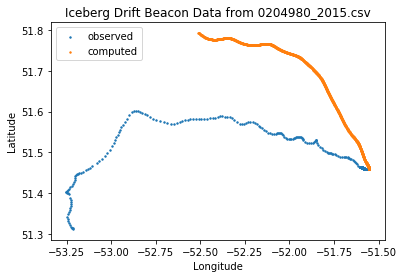

In [59]:
plt.scatter(ref_berg.history['X'], ref_berg.history['Y'], s=2, label='observed')
plt.scatter(sim.history['x'], sim.history['y'], s=2, label='computed')
plt.title('Iceberg Drift Beacon Data from 0204980_2015.csv')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

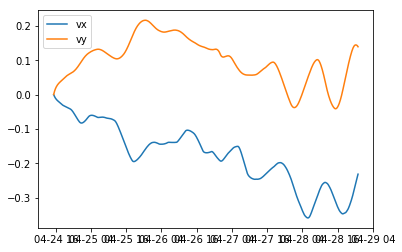

In [55]:
plt.plot(sim.history['t'], sim.history['vx'], label='vx')
plt.plot(sim.history['t'], sim.history['vy'], label='vy')
plt.legend()
plt.show()

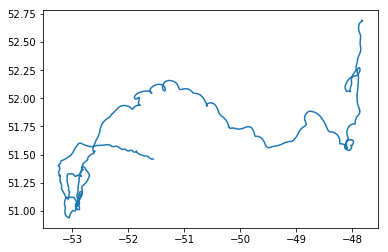

In [56]:
plt.plot(df['Longitude'], df['Latitude'])
plt.show()